### Goal

EASY: ~1.1 MEDIUM: <0.9 MEDIUM-HARD: <0.7 HARD: <0.5
VERY HARD: <0.45

### Data Fields

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

### Importing packages

In [1]:
# data analysis stack
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import timedelta


# Import train-test-split
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set_style('whitegrid')

# machine learning stack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# miscellaneous
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as ss

### Read the Data

In [2]:
train= pd.read_csv('train.csv')
kaggle_test = pd.read_csv('test.csv')

In [3]:
train = pd.read_csv('train.csv', parse_dates=True)

In [4]:
train.shape

(10886, 12)

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### EDA

Define cat and num features 

In [8]:
num_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
cat_features = ['season', 'holiday', 'workingday', 'weather']

In [9]:
features = num_features + cat_features
target = 'count'

**Train-validation split**

In [10]:
# feature and target columns
X,y = train[features],train[target]


In [11]:

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=101)
X_train.shape, X_val.shape

((8708, 11), (2178, 11))

Correlation of num features

<AxesSubplot:>

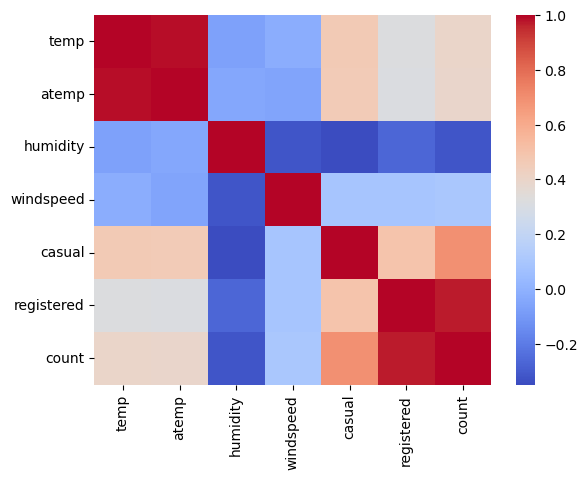

In [12]:
sns.heatmap(data = train[num_features].corr(),cmap='coolwarm')

Correlation of cat features (Cramers)

In [13]:
#Corrs of categorical features 
#Use provided custom functions dor Cramer's correlation (no method available)
def cramers_corrected_stat(df,cat_col1,cat_col2):
    """
    This function spits out corrected Cramer's correlation statistic
    between two categorical columns of a dataframe 
    """
    crosstab = pd.crosstab(df[cat_col1],df[cat_col2])
    chi_sqr = ss.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r,k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    result = np.sqrt(phi_sqr_corr / min( (k_corr-1), (r_corr-1)))
    return round(result,3)

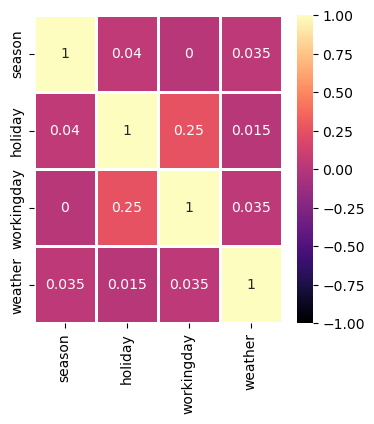

In [14]:
cramer_v_corr = dict(
    zip(
        cat_features,
        [[cramers_corrected_stat(train,f1,f2) for f2 in cat_features] for f1 in cat_features]
    )
)

plt.figure(figsize=(4,4),dpi=100)
sns.heatmap(data=pd.DataFrame(data=cramer_v_corr,index=cat_features),
            cmap='magma',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=-1,
            vmax=1
           );

Correlation of num x cat features (chi sq)

In [15]:
#Works with p-values. p_value in all the cases < 0.05 implying likely correlation between categorical and numerical features
def anova_pvalue(df,cat_col,num_col): #probability of no correlation
    """
    This function spits out the anova p-value (probability of no correlation) 
    between a categorical column and a numerical column of a dataframe
    """
    CategoryGroupLists = df.groupby(cat_col)[num_col].apply(list)
    AnovaResults = ss.f_oneway(*CategoryGroupLists)
    p_value = round(AnovaResults[1],3)
    return p_value

In [16]:
anova_pvalue_dict = dict(
    zip(
        num_features,
        [[anova_pvalue(train,f1,f2) for f2 in num_features] for f1 in cat_features]
    )
)
plt.figure(figsize=(4,4),dpi=100)

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [17]:
anova_pvalue_dict

{'temp': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'atemp': [0.975, 0.586, 0.841, 0.38, 0.0, 0.029, 0.574],
 'humidity': [0.002, 0.01, 0.256, 0.163, 0.0, 0.0, 0.226],
 'windspeed': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [18]:
data=pd.DataFrame(data=anova_pvalue_dict)
data

,temp,atemp,humidity,windspeed
0,0.0,0.975,0.002,0.0
1,0.0,0.586,0.010,0.0
2,0.0,0.841,0.256,0.0
3,0.0,0.380,0.163,0.0
4,0.0,0.000,0.000,0.0
5,0.0,0.029,0.000,0.0
6,0.0,0.574,0.226,0.0


In [19]:
#Corrs of categorical features 
#Use provided custom functions dor Cramer's correlation (no method available)
def cramers_corrected_stat(df,cat_col1,cat_col2):
    """
    This function spits out corrected Cramer's correlation statistic
    between two categorical columns of a dataframe 
    """
    crosstab = pd.crosstab(df[cat_col1],df[cat_col2])
    chi_sqr = ss.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r,k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    result = np.sqrt(phi_sqr_corr / min( (k_corr-1), (r_corr-1)))
    return round(result,3)

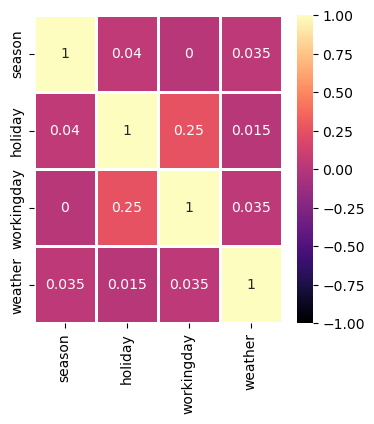

In [20]:
cramer_v_corr = dict(
    zip(
        cat_features,
        [[cramers_corrected_stat(train,f1,f2) for f2 in cat_features] for f1 in cat_features]
    )
)

plt.figure(figsize=(4,4),dpi=100)
sns.heatmap(data=pd.DataFrame(data=cramer_v_corr,index=cat_features),
            cmap='magma',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=-1,
            vmax=1
           );

In [21]:
#Correlation between numrical and categorical features
#Works with p-values. p_value in all the cases < 0.05 implying likely correlation between categorical and numerical features
def anova_pvalue(df,cat_col,num_col): #probability of no correlation
    """
    This function spits out the anova p-value (probability of no correlation) 
    between a categorical column and a numerical column of a dataframe
    """
    CategoryGroupLists = df.groupby(cat_col)[num_col].apply(list)
    AnovaResults = ss.f_oneway(*CategoryGroupLists)
    p_value = round(AnovaResults[1],3)
    return p_value

In [22]:
anova_pvalue_dict = dict(
    zip(
        num_features,
        [[anova_pvalue(train,f1,f2) for f1 in cat_features] for f2 in num_features]
    )
)

In [23]:
anova_pvalue_dict

{'temp': [0.0, 0.975, 0.002, 0.0],
 'atemp': [0.0, 0.586, 0.01, 0.0],
 'humidity': [0.0, 0.841, 0.256, 0.0],
 'windspeed': [0.0, 0.38, 0.163, 0.0],
 'casual': [0.0, 0.0, 0.0, 0.0],
 'registered': [0.0, 0.029, 0.0, 0.0],
 'count': [0.0, 0.574, 0.226, 0.0]}

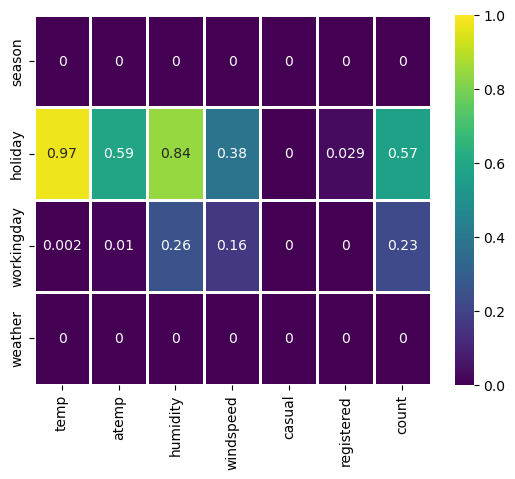

In [24]:
sns.heatmap(data=pd.DataFrame(data=anova_pvalue_dict,index=cat_features),
            cmap='viridis',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=0,
            vmax=1
           );

## Project Milestones: 

Create time-related features

In [25]:
#Feature Splitting - add columns to the datataframe with time, date separately
#create new df with datetime columns converted to pandas datetime
train['datetime'] = pd.to_datetime(train['datetime'])

In [26]:
#create new columns with extracted time features using datetime methods
#1 create column date with extracted date 
train['date'] = train['datetime'].dt.date

In [27]:
#2 cteate column with extracted time
train['hour']= train['datetime'].dt.time

In [28]:
#3 create column with extract the day name 
train['dayname']= train['datetime'].dt.day_name()

In [29]:
train['month']=train['datetime'].dt.month_name()

In [30]:
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,dayname,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00,Saturday,January


In [31]:
train.set_index('datetime', inplace=True)
train


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,dayname,month
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00:00:00,Saturday,January
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01:00:00,Saturday,January
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02:00:00,Saturday,January
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03:00:00,Saturday,January
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04:00:00,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19:00:00,Wednesday,December
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20:00:00,Wednesday,December
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21:00:00,Wednesday,December


<AxesSubplot:xlabel='dayname', ylabel='count'>

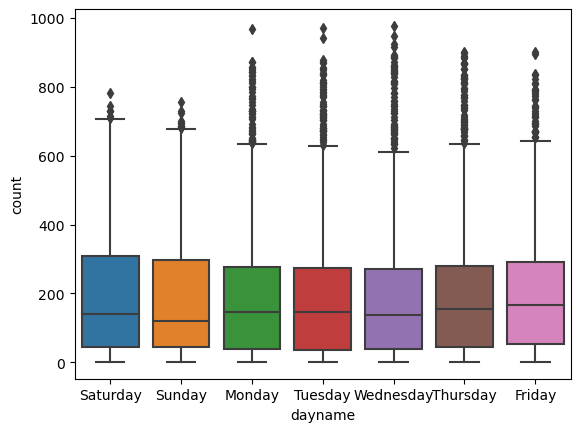

In [32]:
sns.boxplot(x='dayname',y='count',data=train)


In [65]:
#plot the count all rentals per month
#group by month
train_by_month = train.groupby(['season','month'])[['count']].sum().reset_index()
train_by_month

,season,month,count
0,1,February,99113
1,1,January,79884
2,1,March,133501
3,2,April,167402
4,2,June,220733
5,2,May,200147
6,3,August,213516
7,3,July,214617
8,3,September,212529
9,4,December,160160


<AxesSubplot:xlabel='month', ylabel='count'>

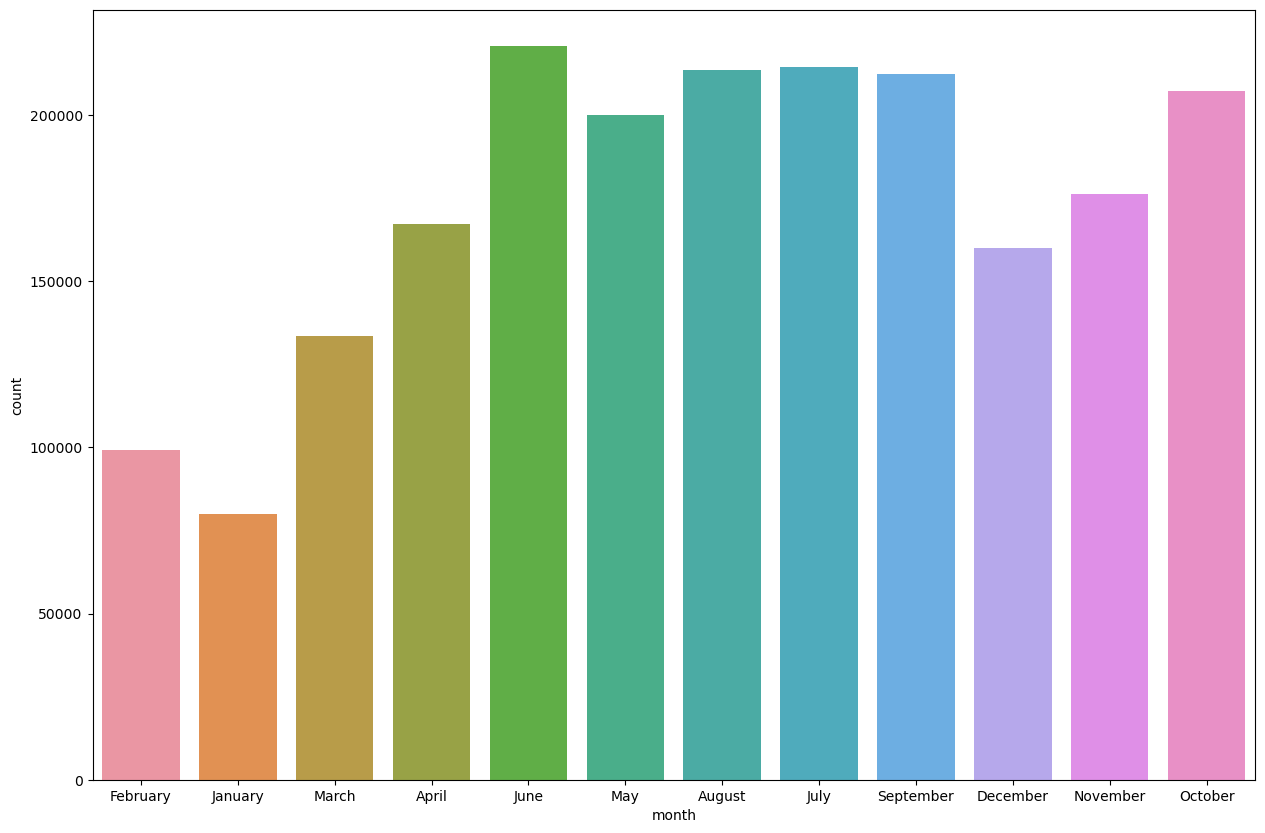

In [66]:
plt.figure(figsize=(15,10))
sns.barplot(data=train_by_month,x='month', y='count')

In [ ]:
plt.plot

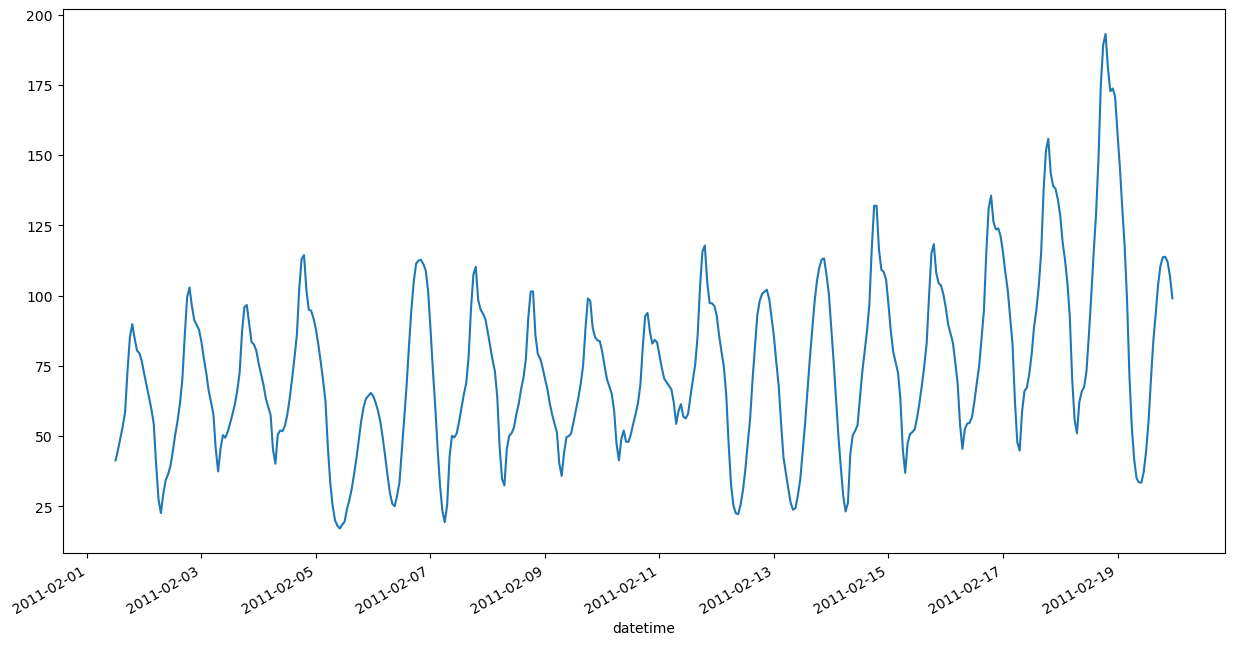

In [53]:
train['count']['2011-02'].rolling(12).mean().plot(figsize=(15, 8));

## Tips ##

**Tip 1:** Make the count plots for registred and casual customers  


**Tip 2:** make a model for each of the above and add them up

**Tip 3:** make countplot by season, by months and by hours (group by hour and compute)

Tip 4: Work on range on months -> degree = count amount of peaks and amount of drafts and add 1

if you have 2 features which have very high correlation -> drop one of them to avoid overfitting

Tip 5: np.log1p('count') -> log transformation -> helps to see distributins in the more simetrical (might help with casual users)

**Tip 5:** use random forest to estimate feature importance

Tip 6: try to play around with windspeed -> obsevation -> looks like up until certain point it cannot be observed -> so makes sense to see correlation and adjust the wimdspeed less than smth 


Tip 7: make day type -> do ppl work on that day or not

### Model Building

**Feature engineering**


In [ ]:

# column transformation
transformer = ColumnTransformer([
    ('scaling', MinMaxScaler(), num_features),
    ('onehot', OneHotEncoder(drop='first'), cat_features)
])


**Model pipeline** 
## cannot be done until all feat eng is done! 

In [ ]:
# pipeline
pipeline = Pipeline(
    [('col_transformer', transformer),                 # step-1 column transformation
     ('lr_model', LinearRegression(fit_intercept=True)) # step-2 linear fit
    ])

# model training
pipeline.fit(X_train,y_train)



#### 2.4 Model Evaluation

In [ ]:
# training score
pipeline.score(X_train,y_train)


In [ ]:
# test score
pipeline.score(X_val,y_val)